In [8]:
import pandas as pd
import numpy as np
from tqdm import tqdm

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Embedding, Dropout, TimeDistributed, Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.callbacks import ModelCheckpoint
from keras.callbacks import ModelCheckpoint, Callback

import pickle
import matplotlib.pyplot as plt
import random
from sklearn.cluster import KMeans

In [9]:
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [10]:
def get_image(image_data):
    split_color = 1024
    colors = {}
    # get red (0), green (1), blue (2) and create three 1024 arrays
    for i in range(0, 3):
        colors[i] = image_data[i*split_color:(i+1)*split_color]

    # convert each of the rgb vectors into a 1024x3 array 
    rgb_list = []
    for i in range(0, split_color):
        rgb_temp = []
        for k in range(0, 3):
            rgb_temp.append(colors[k][i])
        rgb_list.append(rgb_temp)

    # convert the rgb pixels into a 32x32x3 array
    image_list = []
    for i in range(0, 32):
        image_list.append(rgb_list[i*32: (i+1)*32])
    return image_list

# Extract Train and Test Batches

In [11]:
train_data_dict = {}
train_label_dict = {}
path = '../Data/images/'
for i in range(1, 6):
    file_name = 'data_batch_' + str(i)
    batch = unpickle(path + file_name)
    train_data_dict[file_name] = batch[b'data']
    train_label_dict[file_name] = batch[b'labels']

In [12]:
batch = unpickle(path + 'test_batch')
test_data = batch[b'data']
test_label = batch[b'labels']

We want to limit our training experimentation to just batch 1 to begin.

In [13]:
batch1_raw = train_data_dict['data_batch_1']

# Convert to RGB (32x32x3)

In [14]:
# convert our image into a 32x32x3 RGB image
train_images = []
for image in tqdm(batch1_raw):
    train_images.append(np.array(get_image(image)))

test_images = []
for image in tqdm(test_data):
    test_images.append(np.array(get_image(image)))

100%|██████████| 10000/10000 [00:06<00:00, 1445.04it/s]


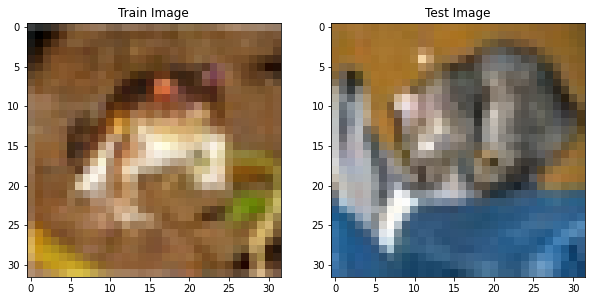

In [15]:
f, ax = plt.subplots(1,2, figsize=(10,5))

ax[0].imshow(train_images[0], interpolation='nearest', cmap='gray')
ax[0].title.set_text('Train Image')

ax[1].imshow(test_images[0], interpolation='nearest', cmap='gray')
ax[1].title.set_text('Test Image')

# Obtain Centroid RGB Pixels (using KMeans)

### Process Sample

In [25]:
pixels_all = []

for l in tqdm(range(0, len(train_images))):
    for i in range(0,32):
        for k in range(0,32):
            pixels_all.append(tuple(all_images[l][i][k]))

100%|██████████| 10000/10000 [00:06<00:00, 1603.14it/s]


In [26]:
pixels_all = set(pixels_all)
pixels_all = [list(x) for x in pixels_all]

In [27]:
# sample pixels
len_pixels = len(pixels_all)
len_pixels_sample = int(len_pixels*.3)

sel_indices = random.sample(range(0, len_pixels), len_pixels_sample)
pixels_sample = [pixels_all[x] for x in sel_indices]

### Run KMeans

In [28]:
k = 20

In [29]:
kmeans = KMeans(n_clusters=k)
kmeans.fit(pixels_sample)

KMeans(n_clusters=20)

In [31]:
# map the centroid pixels
centers_dict = {}
for i in range(0,k):
    centers_dict[i] = [int(np.round(x)) for x in kmeans.cluster_centers_[i]]